### Assignment 8
This assignment uses the College Score Card for Visualization by computing the population mean, sampler mean, and computing its differences. This projects shows the differences of the big and small sampler mean against the population mean.

In [1]:
# 1 - Import necessary libraries
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns 
from random import choice
plt.rcParams["figure.figsize"] = (12,8)   # Global Setting

In [2]:
cd

/root


In [3]:
ls

venv/  work@


In [4]:
cd work

/work


In [5]:
ls -l

total 376845
-rw-r--r--  1 root root 385541173 Jan 15 18:18  CollegeScorecard_Raw_Data_01192021.zip
-rw-rw-r--  1 root root    272161 Apr 19 21:53 'DATA690-2 Assignment8 Deepnote.ipynb'
drwxr-xr-x 12 root root        14 Apr 18 22:24  DATA-690-2-WANG/
-rw-rw-r--  1 root root      4671 Apr 19 21:52  init.ipynb
drwxr-xr-x  2 root root        32 Jan 15 03:40  Input/
drwxr-xr-x  3 root root         3 Apr 17 22:44  __MACOSX/


In [6]:
cd Input

/work/Input


In [7]:
current_folder = os.getcwd()
current_folder


'/work/Input'

In [8]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22
files = os.listdir()
print(len(files))
files

30


['MERGED2015_16_PP.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv',
 'MERGED2013_14_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2002_03_PP.csv',
 'Crosswalks.zip',
 'MERGED1997_98_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2012_13_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1999_00_PP.csv',
 'data.yaml',
 'MERGED2016_17_PP.csv',
 'MERGED2008_09_PP.csv',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2014_15_PP.csv']

In [9]:

csv_files = [file for file in files if file.startswith('MERGED')]
csv_files

['MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2014_15_PP.csv']

In [10]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name

random_file = random.choice(csv_files)
random_file

'MERGED2002_03_PP.csv'

In [11]:

path_random = current_folder + '/' + random_file
path_random

'/work/Input/MERGED2002_03_PP.csv'

In [12]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution 
# ("TUITIONFEE_IN") from this file into a data frame aand display use info()
# function to display a summary information
df = pd.read_csv(path_random, usecols = ["INSTNM", "TUITIONFEE_IN"])
df.head(5)

,INSTNM,TUITIONFEE_IN
0,Community College of the Air Force,NaN
1,Alabama A & M University,3040.0
2,University of Alabama at Birmingham,3880.0
3,Amridge University,8960.0
4,University of Alabama in Huntsville,3764.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6652 entries, 0 to 6651
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         6652 non-null   object 
 1   TUITIONFEE_IN  4049 non-null   float64
dtypes: float64(1), object(1)
memory usage: 104.1+ KB


In [14]:
# 5 - Find out how many observations have missing value.
# Count is the number of entries cels and top is True means there are many missing value
# frequent is the amount missing. If top is False, there is no missing or few missing value,
# frequent is the amount that is not missing
Miss_Val = df["TUITIONFEE_IN"].isnull()
Miss_Val.describe()

count      6652
unique        2
top       False
freq       4049
Name: TUITIONFEE_IN, dtype: object

In [15]:
# 6 - Drop those observations with missing value
# Disaply the number of observations 
Drop_Miss_Val = df.dropna(how='any')
Drop_Miss_Val.head(5)

,INSTNM,TUITIONFEE_IN
1,Alabama A & M University,3040.0
2,University of Alabama at Birmingham,3880.0
3,Amridge University,8960.0
4,University of Alabama in Huntsville,3764.0
5,Alabama State University,2904.0


In [16]:
Drop_Miss_Val.describe()

,TUITIONFEE_IN
count,4049.000000
mean,7850.036799
std,6636.331912
min,0.000000
25%,2312.000000
50%,5950.000000
75%,11880.000000
max,35625.000000


In [17]:
#7 How many observation have 0 tuition
Drop_Miss_Val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4049 entries, 1 to 6650
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4049 non-null   object 
 1   TUITIONFEE_IN  4049 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.9+ KB


In [18]:
Drop_Miss_Val['INSTNM'][1]

'Alabama A & M University'

In [19]:
Drop_Miss_Val['TUITIONFEE_IN'][1]

3040.0

In [20]:
# Checking if there is a zero. There is Zero in TuitionFee_In and no zeros in institution name
(Drop_Miss_Val==0).any()

INSTNM           False
TUITIONFEE_IN     True
dtype: bool

In [21]:
# 8 - Drop those observations with 0 tuition
Drop_Zero = Drop_Miss_Val[Drop_Miss_Val['TUITIONFEE_IN'] != 0]
Drop_Zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4045 entries, 1 to 6650
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4045 non-null   object 
 1   TUITIONFEE_IN  4045 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.8+ KB


In [22]:
# Index was reset to cleanse data
# The stop is the number of floating numbers
# that is not zero and nan
Drop_Zero.reset_index(drop=True, inplace=True)
Drop_Zero.index

RangeIndex(start=0, stop=4045, step=1)

In [23]:
# 9 - Calculate and display the mean (average) of the tuitions of all
# the remaining observations 
def Average():
    Sum = Drop_Zero['TUITIONFEE_IN'].sum()
    Sum = Sum.astype(float)
    Count = Drop_Zero['TUITIONFEE_IN'].count()
    Count = Count.astype(float)
    Average = Sum/Count
    round_avg =round(Average, 2)
    return round_avg


In [24]:
Avg = Average()
Avg

7857.8

In [25]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation. 
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference


In [26]:
# A function was made to randomly select from the cleaned dataframe
# the difference from the tuition and population mean is compute
x = Drop_Zero
def Diff():
    f = len(x)              # length of dataframe
    i = choice(range(f))    # choosing within the range of the length of dataframe
    print(i, '\t', x.INSTNM[i],'\t' , x.TUITIONFEE_IN[i])
    Difference = Avg - x.TUITIONFEE_IN[i]
    round_diff = round(Difference, 2)
    print("If the difference is negative, the tuition is more expensive than population mean,")
    print("positive is cheaper,", "Difference: ")
    return round_diff

In [27]:
Diff()

1088 	 Asbury University 	 15716.0
If the difference is negative, the tuition is more expensive than population mean,
positive is cheaper, Difference: 


-7858.2

In [28]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the 
# difference in means

Diff()

1541 	 Herzing University-Minneapolis 	 7840.0
If the difference is negative, the tuition is more expensive than population mean,
positive is cheaper, Difference: 


17.8

In [29]:
Diff()

539 	 South University-West Palm Beach 	 9585.0
If the difference is negative, the tuition is more expensive than population mean,
positive is cheaper, Difference: 


-1727.2

In [30]:
Diff()

3758 	 Washington Saratoga Warren Hamilton Essex BOCES-Practical Nursing Program 	 6951.0
If the difference is negative, the tuition is more expensive than population mean,
positive is cheaper, Difference: 


906.8

In [31]:
Diff()

3607 	 Ascension College 	 6800.0
If the difference is negative, the tuition is more expensive than population mean,
positive is cheaper, Difference: 


1057.8

### **Observation**
There is a wide difference between the population mean and the universities/college's tuition fees

In [32]:
# 13 - Randomly select 20 observations, display the tuition of these 
# observation. 
Random_20 = Drop_Zero.sample(20)
Random_20.head(5)

,INSTNM,TUITIONFEE_IN
2712,Point Park University,14348.0
3564,IBMC College,14853.0
463,University of Bridgeport,16404.0
2635,La Salle University,21420.0
3673,University of Phoenix-Southern California Campus,11100.0


In [33]:
# 14 - Calculate and displat the mean tuition of these 20 observations
def Rand_Average():
    Random_20 = Drop_Zero.sample(20)
    Sum = Random_20['TUITIONFEE_IN'].sum()
    Sum = Sum.astype(float)
    Count = Random_20['TUITIONFEE_IN'].count()
    Count = Count.astype(float)
    Rand_Avg = Sum/Count
    Rand_Avg = Rand_Avg.astype(float)
    Rand_Avg = round(Rand_Avg, 2)
    Rand_Avg2 = round(Rand_Avg, 2)
    Difference = Avg - Rand_Avg2
    Difference = round(Difference, 2)
    print("Below is the Sample Mean, Population Mean, Difference.")
    return Rand_Avg, Avg, Difference

In [34]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
Sum = Random_20['TUITIONFEE_IN'].sum()
Sum = Sum.astype(float)
Count = Random_20['TUITIONFEE_IN'].count()
Count = Count.astype(float)
Rand_Avg = Sum/Count
Diff = Avg - Rand_Avg
Difference = round(Diff, 2)
print("Sum: ", Sum, "\tCount: ", Count, "\tRandom Average: ", Rand_Avg, 
      "\tDifference: ", Difference)


Sum:  252566.0 	Count:  20.0 	Random Average:  12628.3 	Difference:  -4770.5


In [35]:
# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion
Rand_Average()

Below is the Sample Mean, Population Mean, Difference.


(7104.45, 7857.8, 753.35)

In [36]:
Rand_Average()

Below is the Sample Mean, Population Mean, Difference.


(3554.55, 7857.8, 4303.25)

In [37]:
Rand_Average()

Below is the Sample Mean, Population Mean, Difference.


(7311.25, 7857.8, 546.55)

In [38]:
Rand_Average()

Below is the Sample Mean, Population Mean, Difference.


(11107.65, 7857.8, -3249.85)

In [39]:
Rand_Average()

Below is the Sample Mean, Population Mean, Difference.


(8253.85, 7857.8, -396.05)

In [40]:
Rand_Average()

Below is the Sample Mean, Population Mean, Difference.


(7450.3, 7857.8, 407.5)

### **Observation** 
The difference between the sample mean and population mean has a narrower gap than the difference between the tuition of a school and population mean

In [41]:
# 17 
#Write a function that take two input parameters:
#- x (number of observations) 
#- y (the name of the dataframe). 

#The function will perform the following: 
#- Randomly select x observations from y
#- Calculate the mean of these x observations 
#- Calculate the mean of all observations
#- Calculate the difference between the two means 
#- Return the difference


In [42]:
y = Drop_Zero              # The cleanse dataframe

def Diff_Pop_Sample_Mean(x, y): 
    x = int(input("Enter the desired number of observation: "))
    Random_Samples = y.sample(x)                         # sample of no. of observation     
    Sample_Mean = Random_Samples['TUITIONFEE_IN'].mean()
    Pop_Mean1 = y['TUITIONFEE_IN'].mean()
    Pop_Mean = round(Pop_Mean1, 2)
    Diff1 = Pop_Mean - Sample_Mean
    Diff = round(Diff1, 2)
    print("Random Samples of ", x)
    print(Random_Samples)
    print("Sample_Mean: ", Sample_Mean, "\tPop_Mean: ", Pop_Mean)
    print("Difference: ")
    return Diff
    
Diff_Pop_Sample_Mean(x, y)

Random Samples of  5
                                 INSTNM  TUITIONFEE_IN
2217                  Louisburg College        10565.0
290        Southern California Seminary         7200.0
576           Traviss Technical College         1600.0
802   University of Illinois at Chicago         6592.0
1844         Montclair State University         5792.0
Sample_Mean:  6349.8 	Pop_Mean:  7857.8
Difference: 


1508.0

In [43]:
# 18 - test the function by passing a sample size and the name of the 
# dataframe. Dsplay the return of the function
Diff_Pop_Sample_Mean(x, y)

Random Samples of  10
                                               INSTNM  TUITIONFEE_IN
3255                      Washington State University         4520.0
1612              Mississippi Valley State University         3411.0
3776                          United Technical Center         2300.0
1024                                  Simpson College        16649.0
63        H Councill Trenholm State Community College         2736.0
1184  NW Louisiana Technical College-Mansfield Campus          484.0
3830                  ITT Technical Institute-Webster        11880.0
207               University of California-Santa Cruz         4385.0
2734        Saint Charles Borromeo Seminary-Overbrook         9150.0
3709        Colorado Technical University-Kansas City         9274.0
Sample_Mean:  6478.9 	Pop_Mean:  7857.8
Difference: 


1378.9

In [44]:
# 19 - Create a list of sequence numbers from 1 to 50, name it 
# "sample_sizes"; display it to make sure its members are from 1 to 
sample_sizes = np.arange(1, 51)
sample_sizes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [45]:
# 20 - Create an empty list and name it "means_diff" for differences of 
# population mean and sample means; Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed
means_diff = []
y = Drop_Zero
num_sample = []
def Mean_Diff(sample_sizes, y):
    for i in sample_sizes:
        sample_list = y.sample(i)
        sample_list_mean = sample_list['TUITIONFEE_IN'].mean()
        pop_mean = y["TUITIONFEE_IN"].mean()
        diff = pop_mean - sample_list_mean
        round_diff = round(diff, 2)
        means_diff.append(round_diff)
    return means_diff

In [46]:
d = Mean_Diff(sample_sizes, y)
print(d)

[7265.8, -11079.7, -937.53, -7334.2, -1131.2, 680.3, 2605.51, -1812.33, 715.91, -663.3, -233.2, 2048.8, 945.95, 558.01, -2818.2, 954.3, 2312.56, -173.48, 3564.59, -949.9, -1973.91, -1504.66, 2244.45, 1116.84, -338.44, 793.95, -686.42, -429.52, -409.96, 643.13, -139.52, -665.04, -674.96, -1053.44, 824.51, -870.42, -552.07, -893.86, 1582.77, 486.05, 814.38, -1050.72, -143.15, -277.54, 138.73, 753.17, 777.01, 905.45, -125.12, 742.12]


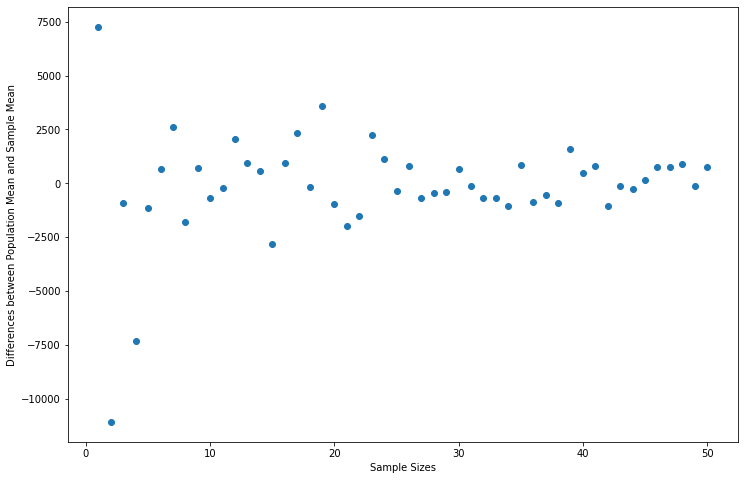

In [47]:
# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough

plt.xlabel("Sample Sizes")
plt.ylabel("Differences between Population Mean and Sample Mean")
plt.scatter(sample_sizes, means_diff) 

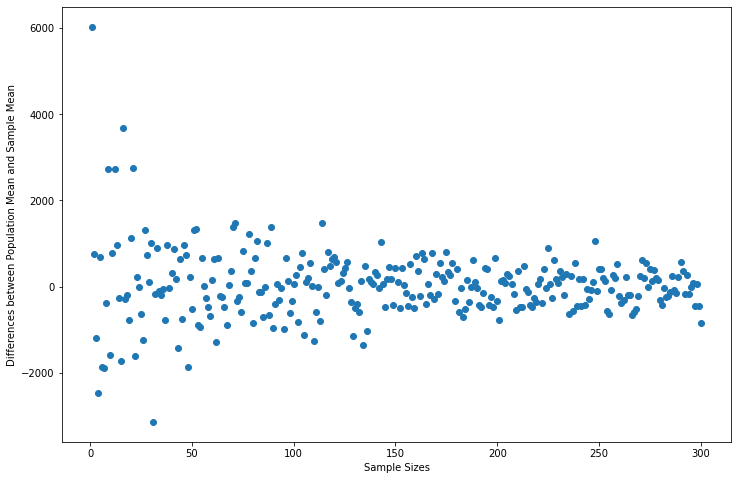

In [48]:
# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.
means_diff = []
sample_sizes = np.arange(1,301)
Mean_Diff(sample_sizes, y)
plt.xlabel("Sample Sizes")
plt.ylabel("Differences between Population Mean and Sample Mean")
plt.scatter(sample_sizes, means_diff)


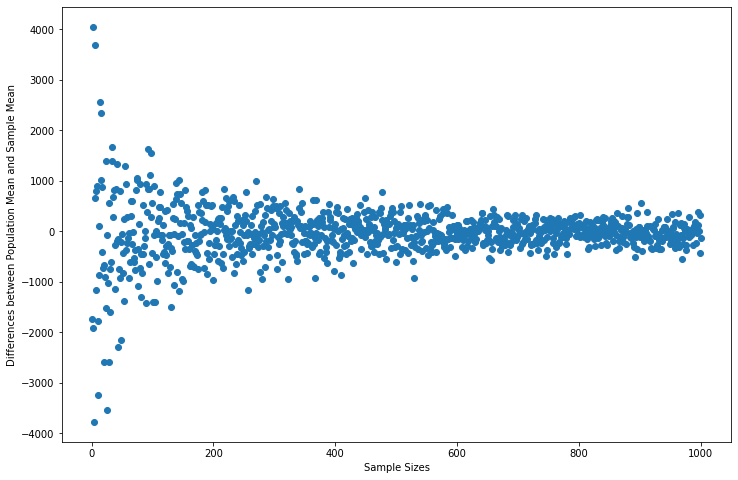

In [49]:
means_diff = []
sample_sizes = np.arange(1, 1001)
Mean_Diff(sample_sizes, y)
plt.xlabel("Sample Sizes")
plt.ylabel("Differences between Population Mean and Sample Mean")
plt.scatter(sample_sizes, means_diff)

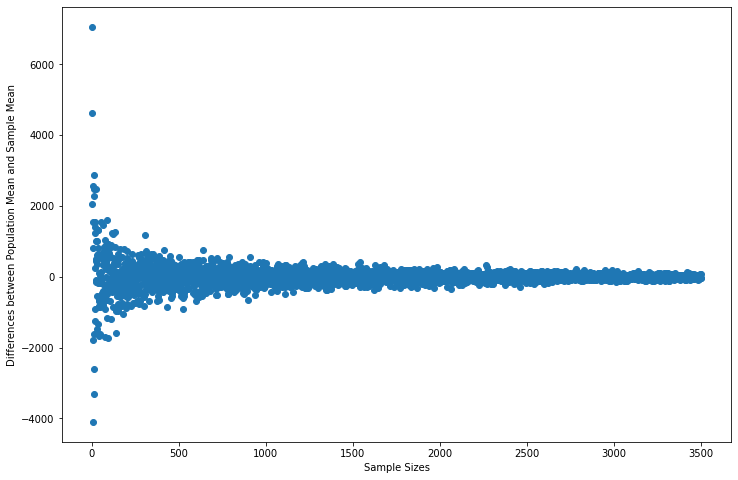

In [50]:
means_diff = []
sample_sizes = np.arange(1, 3501)
Mean_Diff(sample_sizes, y)
plt.xlabel("Sample Sizes")
plt.ylabel("Differences between Population Mean and Sample Mean")
plt.scatter(sample_sizes, means_diff)


### **Observation**
The larger the samples are the more concentrated are the differences within a certain range.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=27901319-aedf-4b36-ba0a-e19011edaf93' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>